In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Cek Dataset

In [2]:
# check quantity of images in training and testing using lambda
import os

train_dir = "/content/drive/MyDrive/Colab Notebooks/UAS/Dataset/male2femaleeyes/train"
val_dir = "/content/drive/MyDrive/Colab Notebooks/UAS/Dataset/male2femaleeyes/test"

femaleeyes_train_path = train_dir + '/femaleeyes'
maleeyes_train_path = train_dir + '/maleeyes'
femaleeyes_val_path = val_dir + '/femaleeyes'
maleeyes_val_path = val_dir + '/maleeyes'

femaleeyes_len_train = len(os.listdir(femaleeyes_train_path))
maleeyes_len_train = len(os.listdir(maleeyes_train_path))
femaleeyes_len_val = len(os.listdir(femaleeyes_val_path))
maleeyes_len_val = len(os.listdir(maleeyes_val_path))

print("jumlah dataset Training : ", femaleeyes_len_train + maleeyes_len_train)
print("jumlah dataset validasi : ", femaleeyes_len_val + maleeyes_len_val)
print("\n\n")
print("jumlah train kelas female : ", femaleeyes_len_train)
print("jumlah train kelas male : ", maleeyes_len_train)
print("jumlah validasi kelas female : ", femaleeyes_len_val)
print("jumlah validasi kelas  male: ", maleeyes_len_val)


jumlah dataset Training :  7775
jumlah dataset validasi :  3749



jumlah train kelas female :  3544
jumlah train kelas male :  4231
jumlah validasi kelas female :  1658
jumlah validasi kelas  male:  2091


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Augmentasi Dataset

In [4]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')


Found 7775 images belonging to 2 classes.
Found 3749 images belonging to 2 classes.


In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, AveragePooling2D, Flatten, GlobalAveragePooling2D, Dropout

# Arsitektur Model and Fit Model

In [6]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=128, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=256, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(AveragePooling2D(pool_size=2, padding='same'))
model.add(GlobalAveragePooling2D())
model.add(Flatten())
model.add(Dropout(0.0001))

In [7]:
# Fully Connected Layer
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.0001))
model.add(Dense(1, activation='sigmoid'))

In [8]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 64)      1792      
                                                                 
 average_pooling2d (AverageP  (None, 75, 75, 64)       0         
 ooling2D)                                                       
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 128)       73856     
                                                                 
 average_pooling2d_1 (Averag  (None, 38, 38, 128)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 256)       295168    
                                                                 
 average_pooling2d_2 (Averag  (None, 19, 19, 256)      0

In [9]:
# Compile model
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(lr=0.0001), 
              loss='binary_crossentropy', 
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [10]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [11]:
# setting Callback so we can save the best model in format h5 and i save it in my drive
callbacks = EarlyStopping(monitor='val_loss', patience=30, verbose=1, mode='auto')        
directory_to_save_best_model_file = '/content/drive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5'
best_model = ModelCheckpoint(directory_to_save_best_model_file, monitor='val_acc', verbose = 1, save_best_only = True)

In [12]:
history = model.fit(
      train_generator,
      steps_per_epoch=102,  # images = batch_size * steps
      epochs=100,
      validation_data=validation_generator,
      validation_steps=10,  #  images = batch_size * steps
      callbacks = [callbacks, best_model])

Epoch 1/100
102/102 [==============================] - ETA: 0s - loss: 0.6918 - acc: 0.5343
Epoch 00001: val_acc improved from -inf to 0.55500, saving model to /content/drive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5
102/102 [==============================] - 535s 5s/step - loss: 0.6918 - acc: 0.5343 - val_loss: 0.6910 - val_acc: 0.5550
Epoch 2/100
102/102 [==============================] - ETA: 0s - loss: 0.6914 - acc: 0.5229
Epoch 00002: val_acc improved from 0.55500 to 0.56500, saving model to /content/drive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5
102/102 [==============================] - 403s 4s/step - loss: 0.6914 - acc: 0.5229 - val_loss: 0.6866 - val_acc: 0.5650
Epoch 3/100
102/102 [==============================] - ETA: 0s - loss: 0.6842 - acc: 0.5494
Epoch 00003: val_acc improved from 0.56500 to 0.62000, saving model to /content/drive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5
102/102 [=========

# Model Evaluation

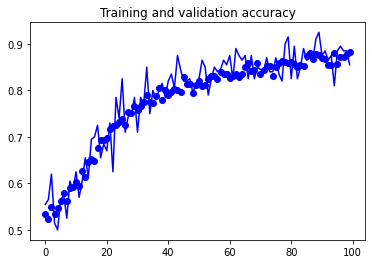

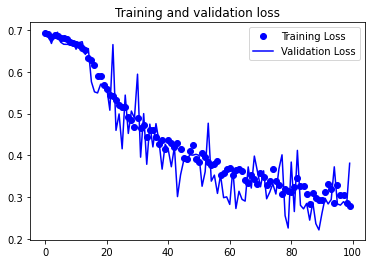

In [13]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [23]:
# import some of library that we need to look the confusion matrix, recall, f1_score, and accuracy score to look how much your model is well
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, accuracy_score
from sklearn.metrics import precision_score, confusion_matrix, classification_report
from sklearn import metrics

import seaborn as sns
sns.set(style='whitegrid')

In [24]:
# loading model to evaluate more depth
from keras.models import load_model
model_path = '/content/drive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5'
model = load_model(model_path)

Found 3749 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.


Accuracy  : 0.8783675646839157
Precision : 0.8831461014102984
f1Score : 0.8769065668918934
[[1309  349]
 [ 107 1984]]


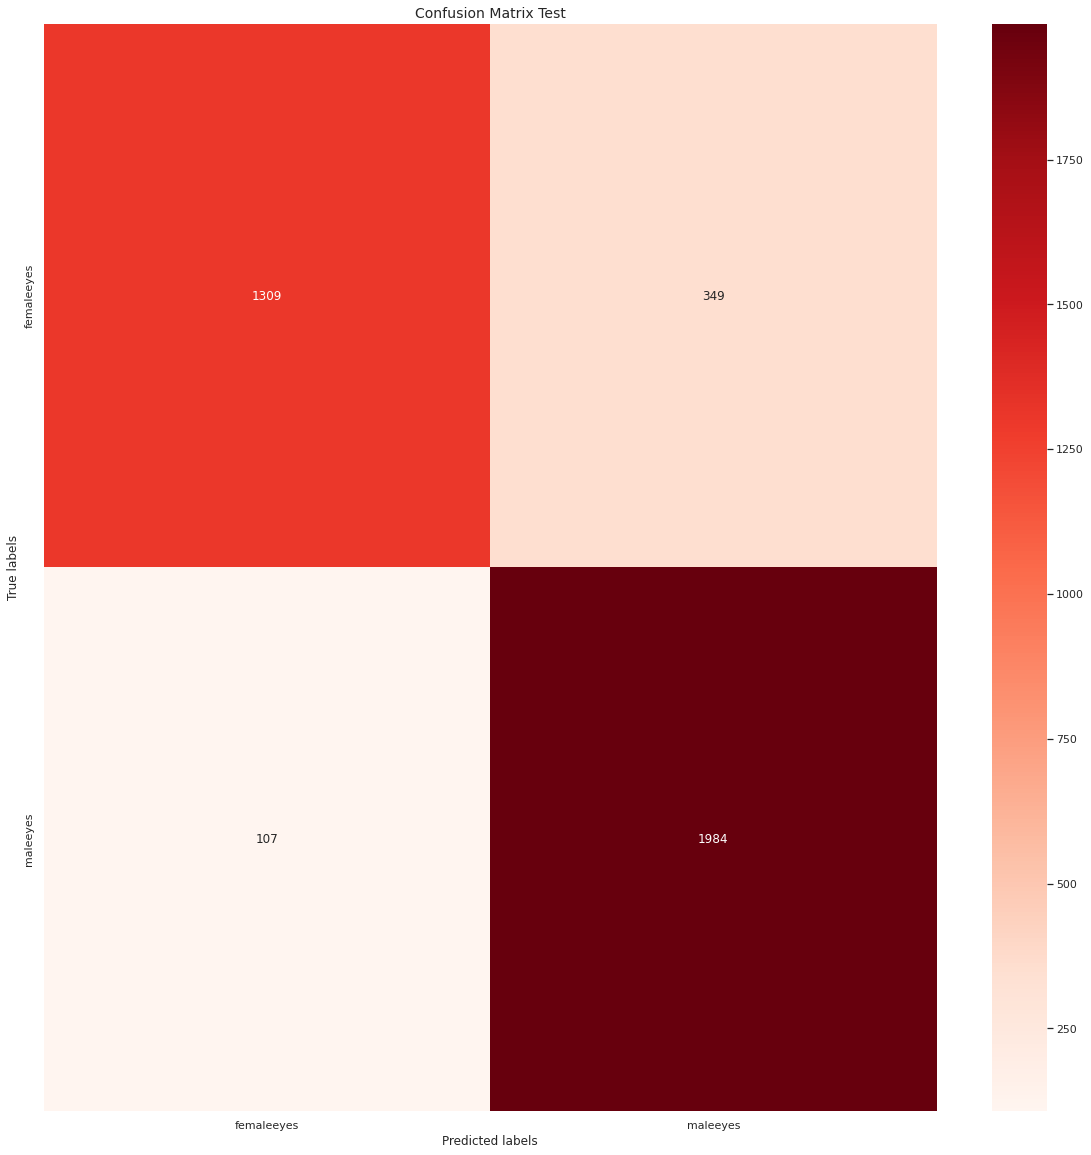

In [25]:
def my_metrics(y_true, y_pred):
    accuracy=accuracy_score(y_true, y_pred)
    precision=precision_score(y_true, y_pred,average='weighted')
    f1Score=f1_score(y_true, y_pred, average='weighted') 
    print("Accuracy  : {}".format(accuracy))
    print("Precision : {}".format(precision))
    print("f1Score : {}".format(f1Score))
    cm=confusion_matrix(y_true, y_pred)
    print(cm)
    return accuracy, precision, f1Score

height=150; width=150
batch_size=20

test_datagen = ImageDataGenerator(rescale=1./255)

TESTING_DIR = '/content/drive/MyDrive/Colab Notebooks/UAS/Dataset/male2femaleeyes/test'

test_generator = test_datagen.flow_from_directory(TESTING_DIR,
                                                  batch_size=batch_size,                                                             
                                                  target_size=(height, width),
                                                  class_mode= None,
                                                  shuffle=False
                                                  )

predictions = model.predict_generator(generator=test_generator)
yPredictions = predictions > 0.5
true_classes = test_generator.classes
class_names = test_generator.class_indices
Cmatrix_test = confusion_matrix(true_classes, yPredictions)

testAcc,testPrec, testFScore = my_metrics(true_classes, yPredictions)

plt.figure(figsize=(20,20))
ax= plt.subplot()
data = np.asarray(Cmatrix_test).reshape(2,2)
sns.heatmap(data,annot=True, fmt='',ax=ax, cmap=plt.cm.Reds)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(class_names)   
ax.yaxis.set_ticklabels(class_names)
plt.title('Confusion Matrix Test',fontsize=14)
plt.show()


In [26]:
from sklearn.metrics import classification_report
print(classification_report(true_classes, yPredictions, target_names=class_names))

              precision    recall  f1-score   support

  femaleeyes       0.92      0.79      0.85      1658
    maleeyes       0.85      0.95      0.90      2091

    accuracy                           0.88      3749
   macro avg       0.89      0.87      0.87      3749
weighted avg       0.88      0.88      0.88      3749



In [28]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [29]:
# loading model to evaluate more depth
import numpy as np
from keras.models import load_model
model_path = '/content/gdrive/MyDrive/Colab Notebooks/UAS/model_drop_batch_weight_from_callback.h5'
model = load_model(model_path)

from google.colab import files
from keras.preprocessing import image

uploaded=files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path= fn
  img=image.load_img(path, target_size=(150, 150))
  
  x=image.img_to_array(img)
  x=np.expand_dims(x, axis=0)
  images = np.vstack([x])
  
  classes = model.predict(images, batch_size=10)
  
  print(classes[0])
  
  if classes[0]>0:
    print(fn + " is a male")
    
  else:
    print(fn + " is a female")
 


Saving Female (1).jpg to Female (1).jpg
Saving Female (2).jpg to Female (2).jpg
Saving Female (3).jpg to Female (3).jpg
Saving Female (4).jpg to Female (4).jpg
Saving Female (5).jpg to Female (5).jpg
Saving male (1).jpg to male (1).jpg
Saving male (2).jpg to male (2).jpg
Saving male (3).jpg to male (3).jpg
Saving male (4).jpg to male (4).jpg
Saving male (5).jpg to male (5).jpg
[0.]
Female (1).jpg is a female
[0.]
Female (2).jpg is a female
[0.]
Female (3).jpg is a female
[0.]
Female (4).jpg is a female
[0.]
Female (5).jpg is a female
[1.1948716e-24]
male (1).jpg is a male
[1.]
male (2).jpg is a male
[1.]
male (3).jpg is a male
[7.1033277e-23]
male (4).jpg is a male
[0.]
male (5).jpg is a female
